In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#컬럼 한꺼번에보기
from IPython.display import display
pd.options.display.max_columns = None
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv('dataset/AREA_CAT_3.csv')
df.head()

,Unnamed: 0,CUST_NO,GENDER,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,RECEIPT_CNT,STORE_CNT,AM_CNT,PM_CNT,OT_CNT,AM_AMT,PM_AMT,OT_AMT,Q1401_AMT,Q1402_AMT,Q1403_AMT,Q1404_AMT,Q1501_AMT,Q1502_AMT,Q1503_AMT,Q1504_AMT,Y14_AMT,Y15_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_AMT,Meat_AMT,Snack_AMT,Health_AMT,FarmF_AMT,SeaF_AMT,SideF_AMT,Drink_AMT,COMPETITOR,MEMBERSHIP,ON_LINE,MOBILE,TOTAL_AMT,AGE_CAT,TOTAL_AMT_CAT,AM_PM_AMT,AM_PCT,PM_PCT,SHOP_T_A,SHOP_T_B,SHOP_T_C,14_15_Q1,14_15_Q2,14_15_Q3,14_15_Q4,14_15_T1,14_15_T2,14_15_T3,14_15_T4,CAT_T주류,CAT_T육류,CAT_T간식류,CAT_T건강식품,CAT_T농산물,CAT_T수산물,CAT_T식사류반찬,CAT_T음료,Alcohol_AMT_CAT,Meat_AMT_CAT,Snack_AMT_CAT,Health_AMT_CAT,FarmF_AMT_CAT,SeaF_AMT_CAT,SideF_AMT_CAT,Drink_AMT_CAT,AGE,ADDR,AMP_PCT,PMP_PCT,1,2,3,4,5,고,저,중,PUR_T_Grocery,PUR_T_SnackDrink,PUR_T_Health,PUR_T_Alcohol,CLUSTER,A_MOBILE,A_ONLINE,B_MOBILE,C_ONLINE,C_MOBILE,간식류,건강식품,농산물,수산물,식사류/반찬,육류,음료,주류,ADDR_cleaned
0,0,1,M,2,506,44,101,326,9,402,249,0,7999193,3896727,0,1765020,2982185,1182800,1905392,1747845,1153940,584270,574468,7835397,4060523,10,32,221,9,210,49,75,42,263750,684741,3246090,3084870,2502759,871740,725300,448970,1,0,0,0,11895920,60s이상,80_100퍼구매금액군,1,61.75,38.25,1.0,0.0,0.0,3512865,4136125,1767070,2479860,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60_80p,40_60p,80_100p,80_100p,60_80p,20p,60_80p,40_60p,60세이상,서울 강남구,67.24,32.76,247.0,100.0,68.0,115.0,118.0,325.0,183.0,140.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,LOC_B
1,1,2,M,1,711,0,0,346,2,529,182,0,11786840,3175020,0,2907240,2446790,1844100,1835670,1903230,940500,1352190,1732140,9033800,5928060,26,44,162,3,358,43,51,24,152440,884510,2711870,354750,7559400,1782520,865770,650600,1,0,0,0,14961860,60s이상,80_100퍼구매금액군,1,74.40,25.60,1.0,0.0,0.0,4810470,3387290,3196290,3567810,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,40_60p,40_60p,80_100p,60_80p,80_100p,40_60p,60_80p,40_60p,60세이상,경기 김포시,78.78,21.22,378.0,103.0,57.0,91.0,82.0,455.0,148.0,108.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,2.0,LOC_A
2,2,3,M,2,0,1,1027,468,3,971,57,0,2649181,151846,0,302182,446083,573288,332446,255880,282380,364157,244611,1653999,1147028,483,15,97,0,184,31,55,163,687620,107945,273750,0,706792,212790,255880,556250,0,0,0,0,2801027,60s이상,20퍼구매금액군,1,94.46,5.54,0.0,0.0,1.0,558062,728463,937445,577057,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,80_100p,20p,20p,20p,20p,20p,20_40p,40_60p,60세이상,서울 은평구,94.58,5.42,32.0,35.0,43.0,78.0,840.0,58.0,887.0,83.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,LOC_C
3,3,4,F,2,498,91,127,383,4,533,183,0,4253139,1506441,0,597753,1016133,497890,363920,926382,878445,703252,775805,2475696,3283884,7,26,210,8,285,14,112,54,31140,307526,1800600,173900,1942124,115900,1084660,303730,1,0,0,0,5759580,60s이상,20_40퍼구매금액군,1,74.44,25.56,1.0,0.0,0.0,1524135,1894578,1201142,1139725,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,20p,20_40p,40_60p,60_80p,60_80p,20p,60_80p,20_40p,60세이상,서울 노원구,73.84,26.16,158.0,111.0,111.0,172.0,164.0,237.0,274.0,205.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,3.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,LOC_B
4,4,5,M,1,633,1,0,368,2,441,193,0,6478630,1887660,0,1787460,1508600,1027940,398440,1171780,802450,0,1669620,4722440,3643850,28,9,320,17,206,25,3,26,276290,168850,3660700,2277230,1230530,350740,63750,338200,0,0,0,0,8366290,60s이상,60_80퍼구매금액군,1,69.56,30.44,1.0,0.0,0.0,2959240,2311050,1027940,2068060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60_80p,20p,80_100p,80_100p,20_40p,20p,20p,20_40p,60세이상,경기 김포시,77.44,22.56,181.0,160.0,75.0,105.0,113.0,284.0,184.0,166.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,LOC_A


In [5]:
df.drop(['Unnamed: 0'],axis=1)

,CUST_NO,GENDER,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,RECEIPT_CNT,STORE_CNT,AM_CNT,PM_CNT,OT_CNT,AM_AMT,PM_AMT,OT_AMT,Q1401_AMT,Q1402_AMT,Q1403_AMT,Q1404_AMT,Q1501_AMT,Q1502_AMT,Q1503_AMT,Q1504_AMT,Y14_AMT,Y15_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_AMT,Meat_AMT,Snack_AMT,Health_AMT,FarmF_AMT,SeaF_AMT,SideF_AMT,Drink_AMT,COMPETITOR,MEMBERSHIP,ON_LINE,MOBILE,TOTAL_AMT,AGE_CAT,TOTAL_AMT_CAT,AM_PM_AMT,AM_PCT,PM_PCT,SHOP_T_A,SHOP_T_B,SHOP_T_C,14_15_Q1,14_15_Q2,14_15_Q3,14_15_Q4,14_15_T1,14_15_T2,14_15_T3,14_15_T4,CAT_T주류,CAT_T육류,CAT_T간식류,CAT_T건강식품,CAT_T농산물,CAT_T수산물,CAT_T식사류반찬,CAT_T음료,Alcohol_AMT_CAT,Meat_AMT_CAT,Snack_AMT_CAT,Health_AMT_CAT,FarmF_AMT_CAT,SeaF_AMT_CAT,SideF_AMT_CAT,Drink_AMT_CAT,AGE,ADDR,AMP_PCT,PMP_PCT,1,2,3,4,5,고,저,중,PUR_T_Grocery,PUR_T_SnackDrink,PUR_T_Health,PUR_T_Alcohol,CLUSTER,A_MOBILE,A_ONLINE,B_MOBILE,C_ONLINE,C_MOBILE,간식류,건강식품,농산물,수산물,식사류/반찬,육류,음료,주류,ADDR_cleaned
0,1,M,2,506,44,101,326,9,402,249,0,7999193,3896727,0,1765020,2982185,1182800,1905392,1747845,1153940,584270,574468,7835397,4060523,10,32,221,9,210,49,75,42,263750,684741,3246090,3084870,2502759,871740,725300,448970,1,0,0,0,11895920,60s이상,80_100퍼구매금액군,1,61.75,38.25,1.0,0.0,0.0,3512865,4136125,1767070,2479860,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60_80p,40_60p,80_100p,80_100p,60_80p,20p,60_80p,40_60p,60세이상,서울 강남구,67.24,32.76,247.0,100.0,68.0,115.0,118.0,325.0,183.0,140.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,LOC_B
1,2,M,1,711,0,0,346,2,529,182,0,11786840,3175020,0,2907240,2446790,1844100,1835670,1903230,940500,1352190,1732140,9033800,5928060,26,44,162,3,358,43,51,24,152440,884510,2711870,354750,7559400,1782520,865770,650600,1,0,0,0,14961860,60s이상,80_100퍼구매금액군,1,74.40,25.60,1.0,0.0,0.0,4810470,3387290,3196290,3567810,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,40_60p,40_60p,80_100p,60_80p,80_100p,40_60p,60_80p,40_60p,60세이상,경기 김포시,78.78,21.22,378.0,103.0,57.0,91.0,82.0,455.0,148.0,108.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,2.0,LOC_A
2,3,M,2,0,1,1027,468,3,971,57,0,2649181,151846,0,302182,446083,573288,332446,255880,282380,364157,244611,1653999,1147028,483,15,97,0,184,31,55,163,687620,107945,273750,0,706792,212790,255880,556250,0,0,0,0,2801027,60s이상,20퍼구매금액군,1,94.46,5.54,0.0,0.0,1.0,558062,728463,937445,577057,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,80_100p,20p,20p,20p,20p,20p,20_40p,40_60p,60세이상,서울 은평구,94.58,5.42,32.0,35.0,43.0,78.0,840.0,58.0,887.0,83.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,LOC_C
3,4,F,2,498,91,127,383,4,533,183,0,4253139,1506441,0,597753,1016133,497890,363920,926382,878445,703252,775805,2475696,3283884,7,26,210,8,285,14,112,54,31140,307526,1800600,173900,1942124,115900,1084660,303730,1,0,0,0,5759580,60s이상,20_40퍼구매금액군,1,74.44,25.56,1.0,0.0,0.0,1524135,1894578,1201142,1139725,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,20p,20_40p,40_60p,60_80p,60_80p,20p,60_80p,20_40p,60세이상,서울 노원구,73.84,26.16,158.0,111.0,111.0,172.0,164.0,237.0,274.0,205.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,3.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,LOC_B
4,5,M,1,633,1,0,368,2,441,193,0,6478630,1887660,0,1787460,1508600,1027940,398440,1171780,802450,0,1669620,4722440,3643850,28,9,320,17,206,25,3,26,276290,168850,3660700,2277230,1230530,350740,63750,338200,0,0,0,0,8366290,60s이상,60_80퍼구매금액군,1,69.56,30.44,1.0,0.0,0.0,2959240,2311050,1027940,2068060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60_80p,20p,80_100p,80_100p,20_40p,20p,20p,20_40p,60세이상,경기 김포시,77.44,22.56,181.0,160.0,75.0,105.0,113.0,284.0,184.0,166.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,LOC_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [6]:
df['Result'] = df.Y15_AMT<df.Y14_AMT*1.0379
df['Result'].replace(True,1,inplace=True)
df['Result'].replace(False,0,inplace=True)

In [7]:
df.head()

,Unnamed: 0,CUST_NO,GENDER,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,RECEIPT_CNT,STORE_CNT,AM_CNT,PM_CNT,OT_CNT,AM_AMT,PM_AMT,OT_AMT,Q1401_AMT,Q1402_AMT,Q1403_AMT,Q1404_AMT,Q1501_AMT,Q1502_AMT,Q1503_AMT,Q1504_AMT,Y14_AMT,Y15_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_AMT,Meat_AMT,Snack_AMT,Health_AMT,FarmF_AMT,SeaF_AMT,SideF_AMT,Drink_AMT,COMPETITOR,MEMBERSHIP,ON_LINE,MOBILE,TOTAL_AMT,AGE_CAT,TOTAL_AMT_CAT,AM_PM_AMT,AM_PCT,PM_PCT,SHOP_T_A,SHOP_T_B,SHOP_T_C,14_15_Q1,14_15_Q2,14_15_Q3,14_15_Q4,14_15_T1,14_15_T2,14_15_T3,14_15_T4,CAT_T주류,CAT_T육류,CAT_T간식류,CAT_T건강식품,CAT_T농산물,CAT_T수산물,CAT_T식사류반찬,CAT_T음료,Alcohol_AMT_CAT,Meat_AMT_CAT,Snack_AMT_CAT,Health_AMT_CAT,FarmF_AMT_CAT,SeaF_AMT_CAT,SideF_AMT_CAT,Drink_AMT_CAT,AGE,ADDR,AMP_PCT,PMP_PCT,1,2,3,4,5,고,저,중,PUR_T_Grocery,PUR_T_SnackDrink,PUR_T_Health,PUR_T_Alcohol,CLUSTER,A_MOBILE,A_ONLINE,B_MOBILE,C_ONLINE,C_MOBILE,간식류,건강식품,농산물,수산물,식사류/반찬,육류,음료,주류,ADDR_cleaned,Result
0,0,1,M,2,506,44,101,326,9,402,249,0,7999193,3896727,0,1765020,2982185,1182800,1905392,1747845,1153940,584270,574468,7835397,4060523,10,32,221,9,210,49,75,42,263750,684741,3246090,3084870,2502759,871740,725300,448970,1,0,0,0,11895920,60s이상,80_100퍼구매금액군,1,61.75,38.25,1.0,0.0,0.0,3512865,4136125,1767070,2479860,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60_80p,40_60p,80_100p,80_100p,60_80p,20p,60_80p,40_60p,60세이상,서울 강남구,67.24,32.76,247.0,100.0,68.0,115.0,118.0,325.0,183.0,140.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,LOC_B,1.0
1,1,2,M,1,711,0,0,346,2,529,182,0,11786840,3175020,0,2907240,2446790,1844100,1835670,1903230,940500,1352190,1732140,9033800,5928060,26,44,162,3,358,43,51,24,152440,884510,2711870,354750,7559400,1782520,865770,650600,1,0,0,0,14961860,60s이상,80_100퍼구매금액군,1,74.40,25.60,1.0,0.0,0.0,4810470,3387290,3196290,3567810,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,40_60p,40_60p,80_100p,60_80p,80_100p,40_60p,60_80p,40_60p,60세이상,경기 김포시,78.78,21.22,378.0,103.0,57.0,91.0,82.0,455.0,148.0,108.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,2.0,LOC_A,1.0
2,2,3,M,2,0,1,1027,468,3,971,57,0,2649181,151846,0,302182,446083,573288,332446,255880,282380,364157,244611,1653999,1147028,483,15,97,0,184,31,55,163,687620,107945,273750,0,706792,212790,255880,556250,0,0,0,0,2801027,60s이상,20퍼구매금액군,1,94.46,5.54,0.0,0.0,1.0,558062,728463,937445,577057,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,80_100p,20p,20p,20p,20p,20p,20_40p,40_60p,60세이상,서울 은평구,94.58,5.42,32.0,35.0,43.0,78.0,840.0,58.0,887.0,83.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,LOC_C,1.0
3,3,4,F,2,498,91,127,383,4,533,183,0,4253139,1506441,0,597753,1016133,497890,363920,926382,878445,703252,775805,2475696,3283884,7,26,210,8,285,14,112,54,31140,307526,1800600,173900,1942124,115900,1084660,303730,1,0,0,0,5759580,60s이상,20_40퍼구매금액군,1,74.44,25.56,1.0,0.0,0.0,1524135,1894578,1201142,1139725,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,20p,20_40p,40_60p,60_80p,60_80p,20p,60_80p,20_40p,60세이상,서울 노원구,73.84,26.16,158.0,111.0,111.0,172.0,164.0,237.0,274.0,205.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,3.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,LOC_B,0.0
4,4,5,M,1,633,1,0,368,2,441,193,0,6478630,1887660,0,1787460,1508600,1027940,398440,1171780,802450,0,1669620,4722440,3643850,28,9,320,17,206,25,3,26,276290,168850,3660700,2277230,1230530,350740,63750,338200,0,0,0,0,8366290,60s이상,60_80퍼구매금액군,1,69.56,30.44,1.0,0.0,0.0,2959240,2311050,1027940,2068060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60_80p,20p,80_100p,80_100p,20_40p,20p,20p,20_40p,60세이상,경기 김포시,77.44,22.56,181.0,160.0,75.0,105.0,113.0,284.0,184.0,166.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,LOC_A,1.0


In [8]:
df_r = df[(df.Y15_AMT)<((df.Y14_AMT)*1.0379)]['CUST_NO']
df_r = pd.DataFrame(df_r)
df_r.head()

,CUST_NO
0,1
1,2
2,3
4,5
9,10


In [9]:
print('총 고객수: 19377명')
print('14년 대비 15년 구매금액 감소 고객: ',np.sum(df.Y14_AMT>df.Y15_AMT))
print('14년 대비 15년 구매금액 증가 고객: ',np.sum(df.Y14_AMT<df.Y15_AMT),'\n')
print('15년 매출총액 14년 매출총액 대비 매출증가 율 :3.79%')
print('매출상승률 고려 14년 대비 15년 구매금액 감소 고객: ',np.sum(df.Y15_AMT<df.Y14_AMT*1.0379))
print('14년 매출 총액:',np.sum(df.Y14_AMT))
print('15년 매출 총액:',np.sum(df.Y15_AMT),'\n')

print('회사 전체 매출 신장률: 5.405% ')
print('15년도 실제 매출:',347417316360)
print('전체 매출 시장률 대비 15년도 예상 매출:',85635517259*1.05405)
print('15년도 전체매출 대비 예상매출과 실제 매출 차액:',90264116966.84894-88885704111)

총 고객수: 19377명
14년 대비 15년 구매금액 감소 고객:  8019
14년 대비 15년 구매금액 증가 고객:  11358 

15년 매출총액 14년 매출총액 대비 매출증가 율 :3.79%
매출상승률 고려 14년 대비 15년 구매금액 감소 고객:  8921
14년 매출 총액: 85635517259
15년 매출 총액: 88885704111 

회사 전체 매출 신장률: 5.405% 
15년도 실제 매출: 347417316360
전체 매출 시장률 대비 15년도 예상 매출: 90264116966.84894
15년도 전체매출 대비 예상매출과 실제 매출 차액: 1378412855.848938


In [10]:
print('남성 여성 비율: ',df.GENDER.value_counts(),'\n')
print('A제휴사 총 구매건수: ',np.sum(df.SHOP_A_CNT))
print('B제휴사 총 구매건수: ',np.sum(df.SHOP_B_CNT))
print('C제휴사 총 구매건수: ',np.sum(df.SHOP_C_CNT),'\n')


print('A제휴사를 가장 많이 이용한 고객 총 금액',np.sum((df.TOTAL_AMT)[df.SHOP_T_A==1]))
print('B제휴사를 가장 많이 이용한 고객 총 금액',np.sum((df.TOTAL_AMT)[df.SHOP_T_B==1]))
print('C제휴사를 가장 많이 이용한 고객 총 금액',np.sum((df.TOTAL_AMT)[df.SHOP_T_C==1]),'\n')

print('A제휴사 고객당 평균 매출',np.mean((df.TOTAL_AMT)[df.SHOP_T_A==1]))
print('B제휴사 고객당 평균 매출',np.mean((df.TOTAL_AMT)[df.SHOP_T_B==1]))
print('C제휴사 고객당 평균 매출',np.mean((df.TOTAL_AMT)[df.SHOP_T_C==1]),'\n')


남성 여성 비율:  F    15895
M     3482
Name: GENDER, dtype: int64 

A제휴사 총 구매건수:  3334763
B제휴사 총 구매건수:  10533292
C제휴사 총 구매건수:  8354801 

A제휴사를 가장 많이 이용한 고객 총 금액 52158483294
B제휴사를 가장 많이 이용한 고객 총 금액 74294584579
C제휴사를 가장 많이 이용한 고객 총 금액 48048694879 

A제휴사 고객당 평균 매출 8350701.776176753
B제휴사 고객당 평균 매출 8795381.150586007
C제휴사 고객당 평균 매출 10304245.095217671 



In [11]:
# 일단 총매출 대비 각 카테고리별 비중
print('총매출액 대비 Alcohol_AMT: ',np.sum(df.Alcohol_AMT) / np.sum(df.TOTAL_AMT))
print('총매출액 대비Meat_AMT: ',np.sum(df.Meat_AMT) / np.sum(df.TOTAL_AMT))
print('총매출액 대비Snack_AMT: ',np.sum(df.Snack_AMT) / np.sum(df.TOTAL_AMT))
print('총매출액 대비Health_AMT: ',np.sum(df.Health_AMT) / np.sum(df.TOTAL_AMT))
print('총매출액 대비FarmF_AMT: ',np.sum(df.FarmF_AMT) / np.sum(df.TOTAL_AMT))
print('총매출액 대비SeaF_AMT: ',np.sum(df.SeaF_AMT) / np.sum(df.TOTAL_AMT))
print('총매출액 대비SideF_AMT: ',np.sum(df.SideF_AMT) / np.sum(df.TOTAL_AMT))
print('총매출액 대비Drink_AMT: ',np.sum(df.Drink_AMT) / np.sum(df.TOTAL_AMT))

총매출액 대비 Alcohol_AMT:  0.05590176060776213
총매출액 대비Meat_AMT:  0.14331817709419
총매출액 대비Snack_AMT:  0.24712791207530385
총매출액 대비Health_AMT:  0.051272736087659435
총매출액 대비FarmF_AMT:  0.22462157960085563
총매출액 대비SeaF_AMT:  0.08150478074436135
총매출액 대비SideF_AMT:  0.08286809979021866
총매출액 대비Drink_AMT:  0.10829186773184453


In [12]:
# case 2-1 고객당 총 구매금액 대비 고객당 카테고리별 구매금액의 비중

df['Alcohol_p_t'] = np.round((df.Alcohol_AMT/df.TOTAL_AMT),3)*1000
df['Meat_p_t'] = np.round((df.Meat_AMT/df.TOTAL_AMT),3)*1000
df['Snack_p_t'] = np.round((df.Snack_AMT/df.TOTAL_AMT),3)*1000
df['Health_p_t'] = np.round((df.Health_AMT/df.TOTAL_AMT),3)*1000
df['FarmF_p_t'] = np.round((df.FarmF_AMT/df.TOTAL_AMT),3)*1000
df['SeaF_p_t'] = np.round((df.SeaF_AMT/df.TOTAL_AMT),3)*1000
df['SideF_p_t'] = np.round((df.SideF_AMT/df.TOTAL_AMT),3)*1000
df['Drink_p_t'] = np.round((df.Drink_AMT/df.TOTAL_AMT),3)*1000

df1 = df[['CUST_NO','Alcohol_p_t','Meat_p_t','Snack_p_t','Health_p_t','FarmF_p_t','SeaF_p_t','SideF_p_t','Drink_p_t','TOTAL_AMT']]


In [13]:
df1.head()

,CUST_NO,Alcohol_p_t,Meat_p_t,Snack_p_t,Health_p_t,FarmF_p_t,SeaF_p_t,SideF_p_t,Drink_p_t,TOTAL_AMT
0,1,22.0,58.0,273.0,259.0,210.0,73.0,61.0,38.0,11895920
1,2,10.0,59.0,181.0,24.0,505.0,119.0,58.0,43.0,14961860
2,3,245.0,39.0,98.0,0.0,252.0,76.0,91.0,199.0,2801027
3,4,5.0,53.0,313.0,30.0,337.0,20.0,188.0,53.0,5759580
4,5,33.0,20.0,438.0,272.0,147.0,42.0,8.0,40.0,8366290


In [14]:
df['Alcohol_p1'] = df.Alcohol_p_t*0.056+1
df['Meat_p1'] = df.Meat_p_t*0.14+1
df['Snack_p1'] = df.Snack_p_t*0.24+1
df['Health_p1'] = df.Health_p_t*0.05+1
df['FarmF_p1'] = df.FarmF_p_t*0.22+1
df['SeaF_p1'] = df.SeaF_p_t*0.08+1
df['SideF_p1'] = df.SideF_p_t*0.08+1
df['Drink_p1'] = df.Drink_p_t*0.11+1

df['TOTAL_CAT_p'] = df['Alcohol_p1']*df['Meat_p1']*df['Snack_p1']*df['Health_p1']*df['FarmF_p1']*\
df['SeaF_p1']*df['SideF_p1']*df['Drink_p1']
df.head()
df['TOTAL_CAT_p'].value_counts()
 
df['log_TOTAL_CAT_p'] = np.log1p(df['TOTAL_CAT_p'])

In [15]:
# 'Alcohol_p1','Meat_p1','Snack_p1','Health_p1','FarmF_p1','SeaF_p1','SideF_p1','Drink_p1'
df2 = df[['Alcohol_p1','Meat_p1','Snack_p1','Health_p1','FarmF_p1','SeaF_p1','SideF_p1','Drink_p1','TOTAL_AMT']]

In [16]:
df2.head()

,Alcohol_p1,Meat_p1,Snack_p1,Health_p1,FarmF_p1,SeaF_p1,SideF_p1,Drink_p1,TOTAL_AMT
0,2.232,9.12,66.52,13.95,47.20,6.84,5.88,5.18,11895920
1,1.560,9.26,44.44,2.20,112.10,10.52,5.64,5.73,14961860
2,14.720,6.46,24.52,1.00,56.44,7.08,8.28,22.89,2801027
3,1.280,8.42,76.12,2.50,75.14,2.60,16.04,6.83,5759580
4,2.848,3.80,106.12,14.60,33.34,4.36,1.64,5.40,8366290


In [17]:
df['Alcohol_p_t1'] = np.round((df.Alcohol_AMT/df.TOTAL_AMT),3)
df['Meat_p_t1'] = np.round((df.Meat_AMT/df.TOTAL_AMT),3)
df['Snack_p_t1'] = np.round((df.Snack_AMT/df.TOTAL_AMT),3)
df['Health_p_t1'] = np.round((df.Health_AMT/df.TOTAL_AMT),3)
df['FarmF_p_t1'] = np.round((df.FarmF_AMT/df.TOTAL_AMT),3)
df['SeaF_p_t1'] = np.round((df.SeaF_AMT/df.TOTAL_AMT),3)
df['SideF_p_t1'] = np.round((df.SideF_AMT/df.TOTAL_AMT),3)
df['Drink_p_t1'] = np.round((df.Drink_AMT/df.TOTAL_AMT),3)
df.head()

,Unnamed: 0,CUST_NO,GENDER,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,RECEIPT_CNT,STORE_CNT,AM_CNT,PM_CNT,OT_CNT,AM_AMT,PM_AMT,OT_AMT,Q1401_AMT,Q1402_AMT,Q1403_AMT,Q1404_AMT,Q1501_AMT,Q1502_AMT,Q1503_AMT,Q1504_AMT,Y14_AMT,Y15_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_AMT,Meat_AMT,Snack_AMT,Health_AMT,FarmF_AMT,SeaF_AMT,SideF_AMT,Drink_AMT,COMPETITOR,MEMBERSHIP,ON_LINE,MOBILE,TOTAL_AMT,AGE_CAT,TOTAL_AMT_CAT,AM_PM_AMT,AM_PCT,PM_PCT,SHOP_T_A,SHOP_T_B,SHOP_T_C,14_15_Q1,14_15_Q2,14_15_Q3,14_15_Q4,14_15_T1,14_15_T2,14_15_T3,14_15_T4,CAT_T주류,CAT_T육류,CAT_T간식류,CAT_T건강식품,CAT_T농산물,CAT_T수산물,CAT_T식사류반찬,CAT_T음료,Alcohol_AMT_CAT,Meat_AMT_CAT,Snack_AMT_CAT,Health_AMT_CAT,FarmF_AMT_CAT,SeaF_AMT_CAT,SideF_AMT_CAT,Drink_AMT_CAT,AGE,ADDR,AMP_PCT,PMP_PCT,1,2,3,4,5,고,저,중,PUR_T_Grocery,PUR_T_SnackDrink,PUR_T_Health,PUR_T_Alcohol,CLUSTER,A_MOBILE,A_ONLINE,B_MOBILE,C_ONLINE,C_MOBILE,간식류,건강식품,농산물,수산물,식사류/반찬,육류,음료,주류,ADDR_cleaned,Result,Alcohol_p_t,Meat_p_t,Snack_p_t,Health_p_t,FarmF_p_t,SeaF_p_t,SideF_p_t,Drink_p_t,Alcohol_p1,Meat_p1,Snack_p1,Health_p1,FarmF_p1,SeaF_p1,SideF_p1,Drink_p1,TOTAL_CAT_p,log_TOTAL_CAT_p,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1
0,0,1,M,2,506,44,101,326,9,402,249,0,7999193,3896727,0,1765020,2982185,1182800,1905392,1747845,1153940,584270,574468,7835397,4060523,10,32,221,9,210,49,75,42,263750,684741,3246090,3084870,2502759,871740,725300,448970,1,0,0,0,11895920,60s이상,80_100퍼구매금액군,1,61.75,38.25,1.0,0.0,0.0,3512865,4136125,1767070,2479860,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60_80p,40_60p,80_100p,80_100p,60_80p,20p,60_80p,40_60p,60세이상,서울 강남구,67.24,32.76,247.0,100.0,68.0,115.0,118.0,325.0,183.0,140.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,LOC_B,1.0,22.0,58.0,273.0,259.0,210.0,73.0,61.0,38.0,2.232,9.12,66.52,13.95,47.20,6.84,5.88,5.18,1.857465e+08,19.039893,0.022,0.058,0.273,0.259,0.210,0.073,0.061,0.038
1,1,2,M,1,711,0,0,346,2,529,182,0,11786840,3175020,0,2907240,2446790,1844100,1835670,1903230,940500,1352190,1732140,9033800,5928060,26,44,162,3,358,43,51,24,152440,884510,2711870,354750,7559400,1782520,865770,650600,1,0,0,0,14961860,60s이상,80_100퍼구매금액군,1,74.40,25.60,1.0,0.0,0.0,4810470,3387290,3196290,3567810,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,40_60p,40_60p,80_100p,60_80p,80_100p,40_60p,60_80p,40_60p,60세이상,경기 김포시,78.78,21.22,378.0,103.0,57.0,91.0,82.0,455.0,148.0,108.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,2.0,LOC_A,1.0,10.0,59.0,181.0,24.0,505.0,119.0,58.0,43.0,1.560,9.26,44.44,2.20,112.10,10.52,5.64,5.73,5.382542e+07,17.801256,0.010,0.059,0.181,0.024,0.505,0.119,0.058,0.043
2,2,3,M,2,0,1,1027,468,3,971,57,0,2649181,151846,0,302182,446083,573288,332446,255880,282380,364157,244611,1653999,1147028,483,15,97,0,184,31,55,163,687620,107945,273750,0,706792,212790,255880,556250,0,0,0,0,2801027,60s이상,20퍼구매금액군,1,94.46,5.54,0.0,0.0,1.0,558062,728463,937445,577057,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,80_100p,20p,20p,20p,20p,20p,20_40p,40_60p,60세이상,서울 은평구,94.58,5.42,32.0,35.0,43.0,78.0,840.0,58.0,887.0,83.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,LOC_C,1.0,245.0,39.0,98.0,0.0,252.0,76.0,91.0,199.0,14.720,6.46,24.52,1.00,56.44,7.08,8.28,22.89,1.765864e+08,18.989321,0.245,0.039,0.098,0.000,0.252,0.076,0.091,0.199
3,3,4,F,2,498,91,127,383,4,533,183,0,4253139,1506441,0,597753,1016133,497890,363920,926382,878445,703252,775805,2475696,3283884,7,26,210,8,285,14,112,54,31140,307526,1800600,173900,1942124,115900,1084660,303730,1,0,0,0,5759580,60s이상,20_40퍼구매금액군,1,74.44,25.56,1.0,0.0,0.0,1524135,1894578,1201142,1139725,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,20p,20_40p,40_60p,60_80p,60_80p,20p,60_80p,20_40p,60세이상,서울 노원구,73.84,26.16,158.0,111.0,111.0,172.0,164.0,237.0,274.0,205.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,3.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,LOC_B,0.0,5.0,53.0,313.0,30.0,337.0,20.0,188.0,53.0,1.280,8.42,76.12,2.50,75.14,2.60,16.04,6.83,4.389656e+07,17.597346,0.005,0.053,0.313,0.030,0.3

In [18]:
print('80_100p등급 주류소비 비중 평균',np.mean((df.Alcohol_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']))
print('80_100p등급 육류소비 비중 평균',np.mean((df.Meat_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']))
print('80_100p등급 간식류소비 비중 평균',np.mean((df.Snack_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']))
print('80_100p등급 건강식품소비 비중 평균',np.mean((df.Health_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']))
print('80_100p등급 농산물소비 비중 평균',np.mean((df.FarmF_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']))
print('80_100p등급 수산물소비 비중 평균',np.mean((df.SeaF_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']))
print('80_100p등급 식사류반찬소비 비중 평균',np.mean((df.SideF_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']))
print('80_100p등급 음료소비 비중 평균',np.mean((df.Drink_p_t1)[df.TOTAL_AMT_CAT=='80_100퍼구매금액군']),'\n')

print('60_80p등급 주류소비 비중 평균',np.mean((df.Alcohol_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))
print('60_80p등급 육류소비 비중 평균',np.mean((df.Meat_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))
print('60_80p등급 간식류소비 비중 평균',np.mean((df.Snack_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))
print('60_80p등급 건강식품소비 비중 평균',np.mean((df.Health_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))
print('60_80p등급 농산물소비 비중 평균',np.mean((df.FarmF_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))
print('60_80p등급 수산물소비 비중 평균',np.mean((df.SeaF_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))
print('60_80p등급 식사류반찬소비 비중 평균',np.mean((df.SideF_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))
print('60_80p등급 음료소비 비중 평균',np.mean((df.Drink_p_t1)[df.TOTAL_AMT_CAT=='60_80퍼구매금액군']))

80_100p등급 주류소비 비중 평균 0.05494994840041279
80_100p등급 육류소비 비중 평균 0.17249097007223943
80_100p등급 간식류소비 비중 평균 0.19913028895768833
80_100p등급 건강식품소비 비중 평균 0.06627528379772962
80_100p등급 농산물소비 비중 평균 0.24789912280701754
80_100p등급 수산물소비 비중 평균 0.08393369453044376
80_100p등급 식사류반찬소비 비중 평균 0.08442698658410734
80_100p등급 음료소비 비중 평균 0.0872827657378741 

60_80p등급 주류소비 비중 평균 0.04708929032258065
60_80p등급 육류소비 비중 평균 0.15730890322580646
60_80p등급 간식류소비 비중 평균 0.22363741935483872
60_80p등급 건강식품소비 비중 평균 0.04136929032258064
60_80p등급 농산물소비 비중 평균 0.249432
60_80p등급 수산물소비 비중 평균 0.07969548387096774
60_80p등급 식사류반찬소비 비중 평균 0.09673883870967742
60_80p등급 음료소비 비중 평균 0.10030322580645161


In [19]:
print('A제휴사를 가장 많이 이용한 고객 총 금액',np.sum((df.TOTAL_AMT)[df.SHOP_T_A==1]))
print('B제휴사를 가장 많이 이용한 고객 총 금액',np.sum((df.TOTAL_AMT)[df.SHOP_T_B==1]))
print('C제휴사를 가장 많이 이용한 고객 총 금액',np.sum((df.TOTAL_AMT)[df.SHOP_T_C==1]))

print('A제휴사 고객당 평균 매출',np.mean((df.TOTAL_AMT)[df.SHOP_T_A==1]))
print('B제휴사 고객당 평균 매출',np.mean((df.TOTAL_AMT)[df.SHOP_T_B==1]))
print('C제휴사 고객당 평균 매출',np.mean((df.TOTAL_AMT)[df.SHOP_T_C==1]))



A제휴사를 가장 많이 이용한 고객 총 금액 52158483294
B제휴사를 가장 많이 이용한 고객 총 금액 74294584579
C제휴사를 가장 많이 이용한 고객 총 금액 48048694879
A제휴사 고객당 평균 매출 8350701.776176753
B제휴사 고객당 평균 매출 8795381.150586007
C제휴사 고객당 평균 매출 10304245.095217671


In [20]:
def TA_S(TOTAL_AMT_CAT, SHOP_T_A, SHOP_T_B, SHOP_T_C):
    if (TOTAL_AMT_CAT=='20퍼구매금액군' and SHOP_T_A==1):
        return 'A20'
    elif (TOTAL_AMT_CAT=='20_40퍼구매금액군' and SHOP_T_A==1):
        return 'A40'
    elif TOTAL_AMT_CAT=='40_60퍼구매금액군' and SHOP_T_A==1:
        return 'A60'
    elif TOTAL_AMT_CAT=='60_80퍼구매금액군' and SHOP_T_A==1:
        return 'A80'
    elif TOTAL_AMT_CAT=='80_100퍼구매금액군' and SHOP_T_A==1:
        return 'A100'
    elif TOTAL_AMT_CAT=='20퍼구매금액군' and SHOP_T_B==1:
        return 'B20'
    elif TOTAL_AMT_CAT=='20_40퍼구매금액군' and SHOP_T_B==1:
        return 'B40'
    elif TOTAL_AMT_CAT=='40_60퍼구매금액군' and SHOP_T_B==1:
        return 'B60'
    elif TOTAL_AMT_CAT=='60_80퍼구매금액군' and SHOP_T_B==1:
        return 'B80'
    elif TOTAL_AMT_CAT=='80_100퍼구매금액군' and SHOP_T_B==1:
        return 'B100'
    elif TOTAL_AMT_CAT=='20퍼구매금액군' and SHOP_T_C==1:
        return 'C20'
    elif TOTAL_AMT_CAT=='20_40퍼구매금액군' and SHOP_T_C==1:
        return 'C40'
    elif TOTAL_AMT_CAT=='40_60퍼구매금액군' and SHOP_T_C==1:
        return 'C60'
    elif TOTAL_AMT_CAT=='60_80퍼구매금액군' and SHOP_T_C==1:
        return 'C80'
    elif TOTAL_AMT_CAT=='80_100퍼구매금액군' and SHOP_T_C==1:
        return 'C100'
    
df['TA_S'] = df.apply(lambda x: TA_S(x['TOTAL_AMT_CAT'], x['SHOP_T_A'], x['SHOP_T_B'], x['SHOP_T_C']),axis=1)   

In [21]:
# 카테고리별 비중 로그변환
# Alcohol_p1	Meat_p1	Snack_p1	Health_p1	FarmF_p1	SeaF_p1	SideF_p1	Drink_p1
df['log_Alcohol_p1'] = np.log1p(df.Alcohol_p1)
df['log_Meat_p1'] = np.log1p(df.Meat_p1)
df['log_Snack_p1'] = np.log1p(df.Snack_p1)
df['log_Health_p1'] = np.log1p(df.Health_p1)
df['log_FarmF_p1'] = np.log1p(df.FarmF_p1)
df['log_SeaF_p1'] = np.log1p(df.SeaF_p1)
df['log_SideF_p1'] = np.log1p(df.SideF_p1)
df['log_Drink_p1'] = np.log1p(df.Drink_p1)


Text(0.5, 1.0, '고객구매등급당 육류 구매 비중')

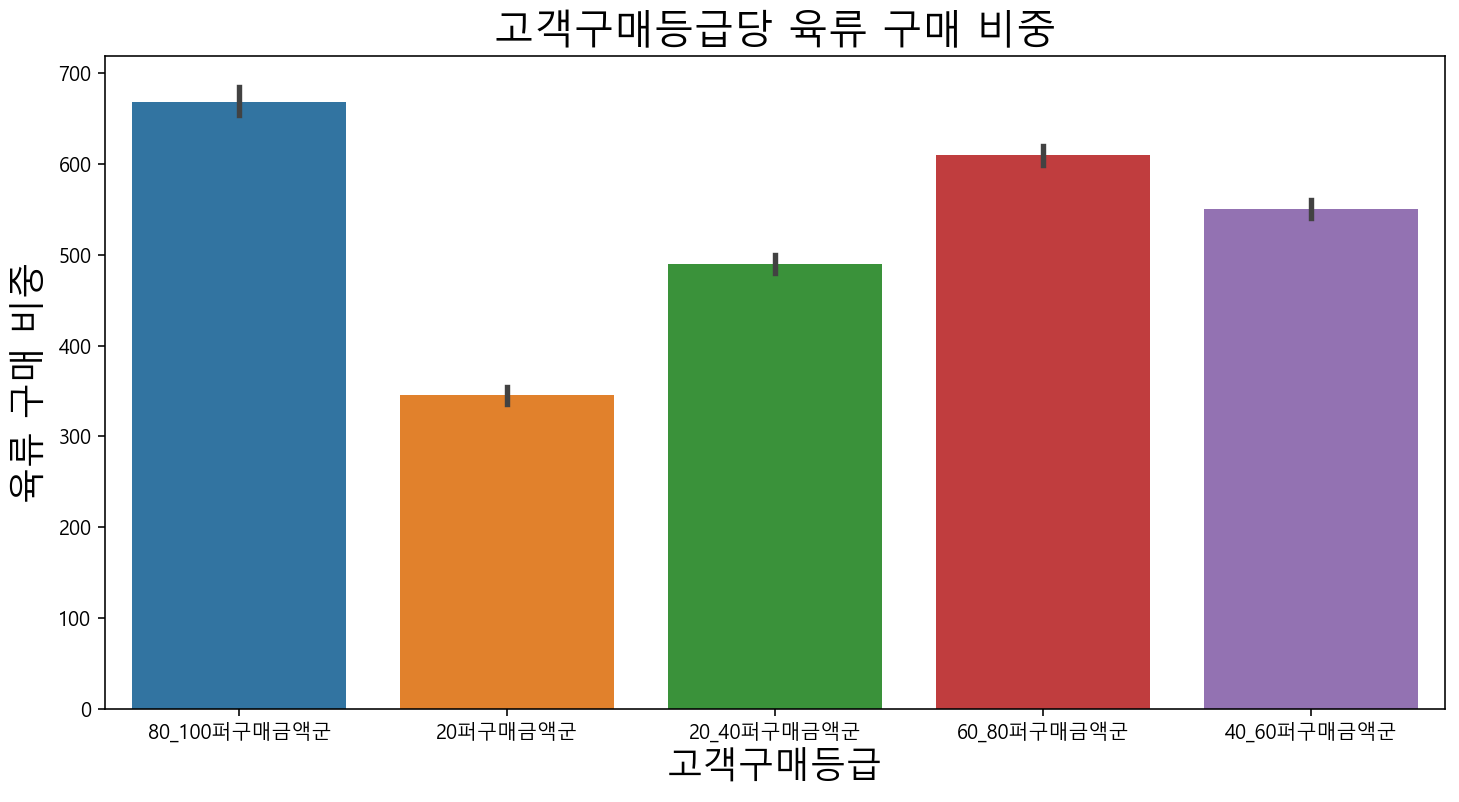

In [22]:
# 육류를 많이 구매할수록 구매등급이 높았다.
# plot_order = df.sort_values(by='TOTAL_AMT_CAT', ascending=False).TOTAL_AMT_CAT.values
plt.figure(figsize=(12,6))
df1= sns.barplot(x='TOTAL_AMT_CAT',y='Meat_p_t1',data=df,orient='v',estimator=sum)
df1.set_xlabel(xlabel = '고객구매등급',fontsize=18)
df1.set_ylabel(ylabel= "육류 구매 비중",fontsize=18)
df1.set_title(label='고객구매등급당 육류 구매 비중',fontsize=20)

Text(0.5, 1.0, '고객구매등급당 간식류 구매 비중')

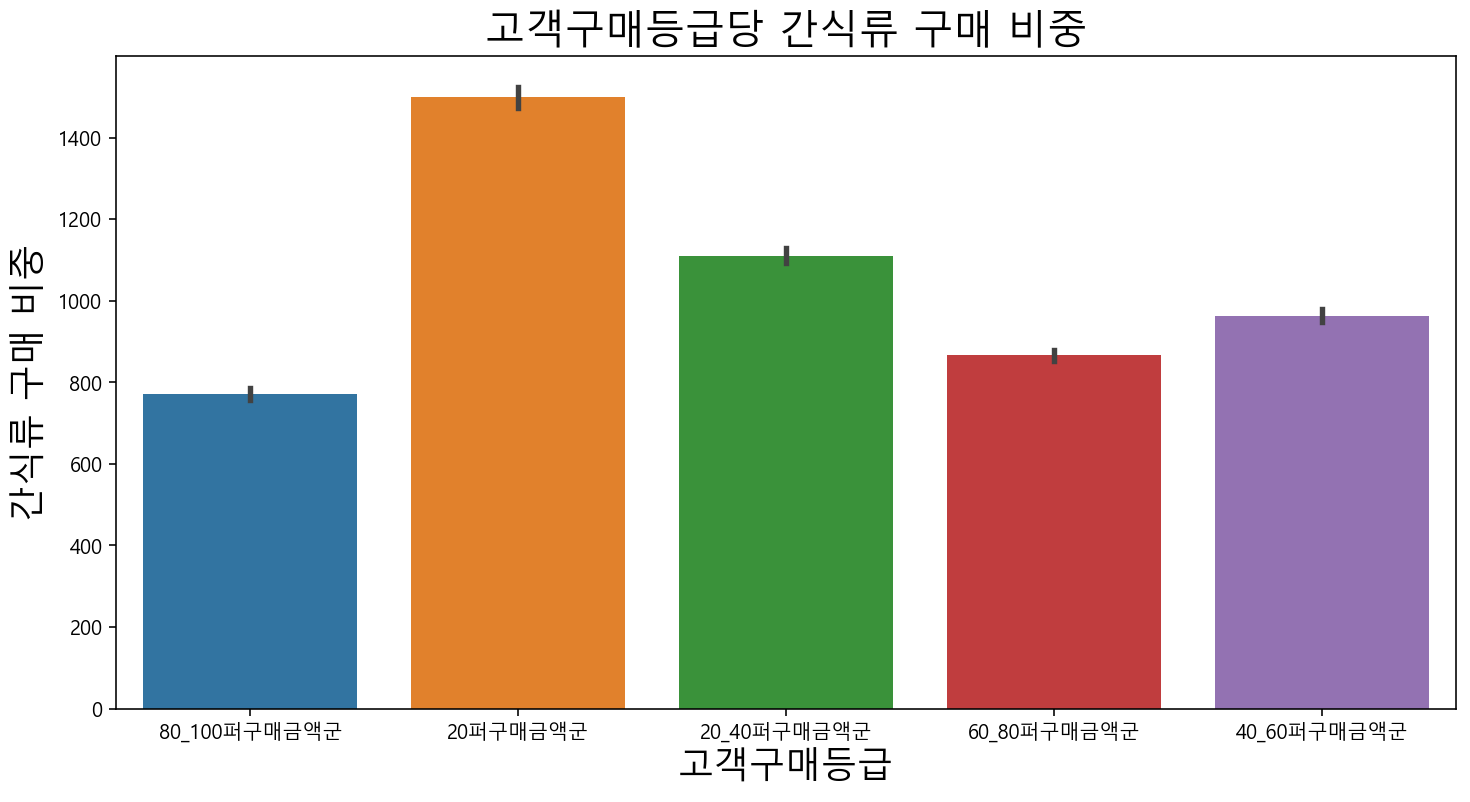

In [23]:
# 간식류를 많이 구매할수록 구매등급이 낮았다.
# plot_order = df.sort_values(by='TOTAL_AMT_CAT', ascending=False).TOTAL_AMT_CAT.values
plt.figure(figsize=(12,6))
df1= sns.barplot(x='TOTAL_AMT_CAT',y='Snack_p_t1',data=df,orient='v',estimator=sum)
df1.set_xlabel(xlabel = '고객구매등급',fontsize=18)
df1.set_ylabel(ylabel= "간식류 구매 비중",fontsize=18)
df1.set_title(label='고객구매등급당 간식류 구매 비중',fontsize=20)


<AxesSubplot:xlabel='log_TOTAL_AMT', ylabel='Density'>

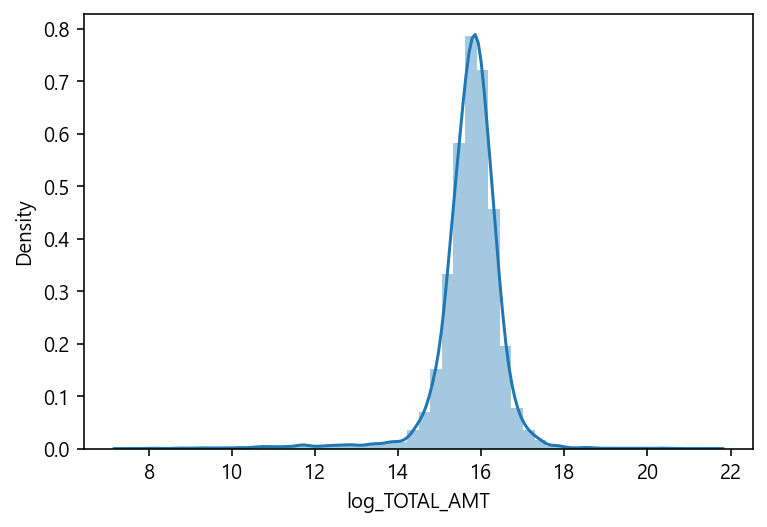

In [24]:
df['log_TOTAL_AMT'] = np.log1p(df.TOTAL_AMT)
sns.distplot(df['log_TOTAL_AMT'])

<AxesSubplot:xlabel='Alcohol_p1', ylabel='Density'>

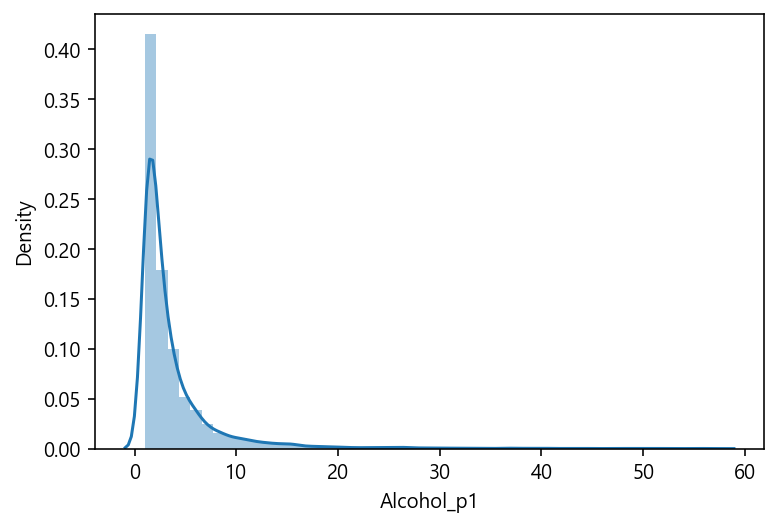

In [25]:
sns.distplot(df['Alcohol_p1'])

<AxesSubplot:xlabel='log_Alcohol_p1', ylabel='Density'>

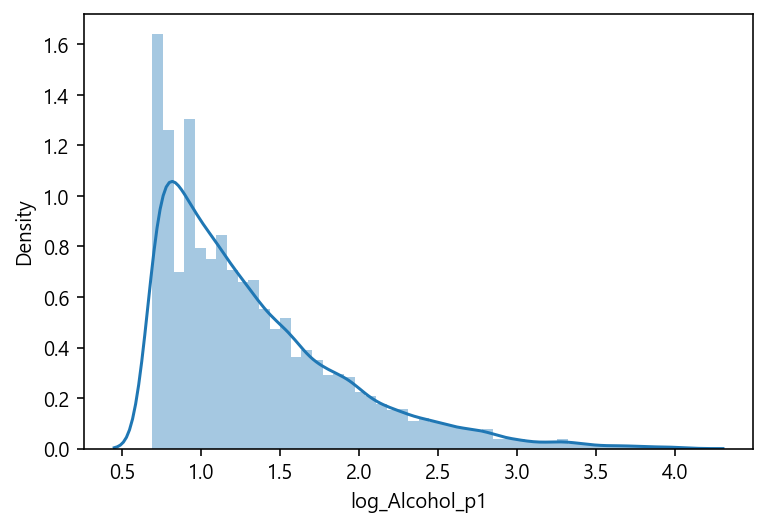

In [26]:

sns.distplot(df['log_Alcohol_p1'])

In [27]:

# Drop 하지 않는 숫자형 Null 칼럼들은 평균값으로 대체
df.fillna(df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입 추출 -> 문자형은 널값 처리가 안되있음
null_column_count = df.isnull().sum()[df.isnull().sum()>0]
print('Null feature type:\n',df.dtypes[null_column_count.index])




Null feature type:
 ADDR            object
ADDR_cleaned    object
TA_S            object
dtype: object


In [28]:
# 원핫 인코딩
print('ohe 전 shape:',df.shape)
df_ohe = pd.get_dummies(df)
print('ohe 후 shape:',df_ohe.shape)

null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum()>0]
print(df_ohe.dtypes[null_column_count.index])

ohe 전 shape: (19377, 146)
ohe 후 shape: (19377, 250)
Series([], dtype: object)


In [29]:
df_ohe.columns[120:150]

Index(['SideF_p_t1', 'Drink_p_t1', 'log_Alcohol_p1', 'log_Meat_p1',
       'log_Snack_p1', 'log_Health_p1', 'log_FarmF_p1', 'log_SeaF_p1',
       'log_SideF_p1', 'log_Drink_p1', 'log_TOTAL_AMT', 'GENDER_F', 'GENDER_M',
       'AGE_CAT_20s', 'AGE_CAT_30s', 'AGE_CAT_40s', 'AGE_CAT_50s',
       'AGE_CAT_60s이상', 'AGE_CAT_u20s', 'TOTAL_AMT_CAT_20_40퍼구매금액군',
       'TOTAL_AMT_CAT_20퍼구매금액군', 'TOTAL_AMT_CAT_40_60퍼구매금액군',
       'TOTAL_AMT_CAT_60_80퍼구매금액군', 'TOTAL_AMT_CAT_80_100퍼구매금액군',
       'Alcohol_AMT_CAT_20_40p', 'Alcohol_AMT_CAT_20p',
       'Alcohol_AMT_CAT_40_60p', 'Alcohol_AMT_CAT_60_80p',
       'Alcohol_AMT_CAT_80_100p', 'Meat_AMT_CAT_20_40p'],
      dtype='object')

In [30]:
# 평가용 사용자 함수
from sklearn.linear_model import LinearRegression, Ridge, Lasso # 이런거들이 클래스
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

def get_rmse(model):
    fit = model.fit(X_train,y_train)
    pred=model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print('{0}로그 변환된 RMSLE: {1}'.\
          format(model.__class__.__name__,np.round(rmse,3),))
    print('Variance score : {0:.3f}'.format(r2_score(y_test,pred)))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse =get_rmse(model)
        rmses.append(rmse)
    return rmses

In [31]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할.
# 평가용 사용자 함수
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_features = df_ohe[['AGE_19세이하', 'AGE_20세~24세', 'AGE_25세~29세', 'AGE_30세~34세',
                     'AGE_35세~39세', 'AGE_40세~44세', 'AGE_45세~49세', 'AGE_50세~54세',
                     'AGE_55세~59세', 'AGE_60세이상', 
                     'GENDER_M', 'GENDER_F',
                     'MOBILE',
                     'Alcohol_p_t1', 'Meat_p_t1', 'Snack_p_t1',
       'Health_p_t1', 'FarmF_p_t1', 'SeaF_p_t1','SideF_p_t1', 'Drink_p_t1',
                     'TA_S_A100', 'TA_S_A20', 'TA_S_A40', 'TA_S_A60', 'TA_S_A80', 
                     'TA_S_B100', 'TA_S_B20', 'TA_S_B40', 'TA_S_B60', 'TA_S_B80', 
                     'TA_S_C100', 'TA_S_C20', 'TA_S_C40', 'TA_S_C60', 'TA_S_C80','1','2','3','4','5']]

y_target = df_ohe['log_TOTAL_AMT'] # 로그 변환 된거임

X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,\
                                                 test_size=0.2,random_state=71)

# 모델별로 평가 수행
lr_reg = LinearRegression()

rf_reg = RandomForestRegressor()

dt_reg = DecisionTreeRegressor()

ridge_reg = Ridge()

lasso_reg = Lasso()

xgb_reg = XGBRegressor()

lgbm_reg = LGBMRegressor()

models = [lr_reg,rf_reg,dt_reg,ridge_reg,lasso_reg,xgb_reg,lgbm_reg]

get_rmses(models)

LinearRegression로그 변환된 RMSLE: 0.414
Variance score : 0.717
RandomForestRegressor로그 변환된 RMSLE: 0.141
Variance score : 0.967
DecisionTreeRegressor로그 변환된 RMSLE: 0.235
Variance score : 0.909
Ridge로그 변환된 RMSLE: 0.418
Variance score : 0.712
Lasso로그 변환된 RMSLE: 0.531
Variance score : 0.535
[16:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor로그 변환된 RMSLE: 0.159
Variance score : 0.958
LGBMRegressor로그 변환된 RMSLE: 0.141
Variance score : 0.967


[0.41408008527319795,
 0.14147560537172896,
 0.23498359809476912,
 0.4179024456659812,
 0.5310057899405763,
 0.15888813879156696,
 0.14076008140611068]

In [32]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개, - 하위 10개의 회귀 계수를 추출해 반환.
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

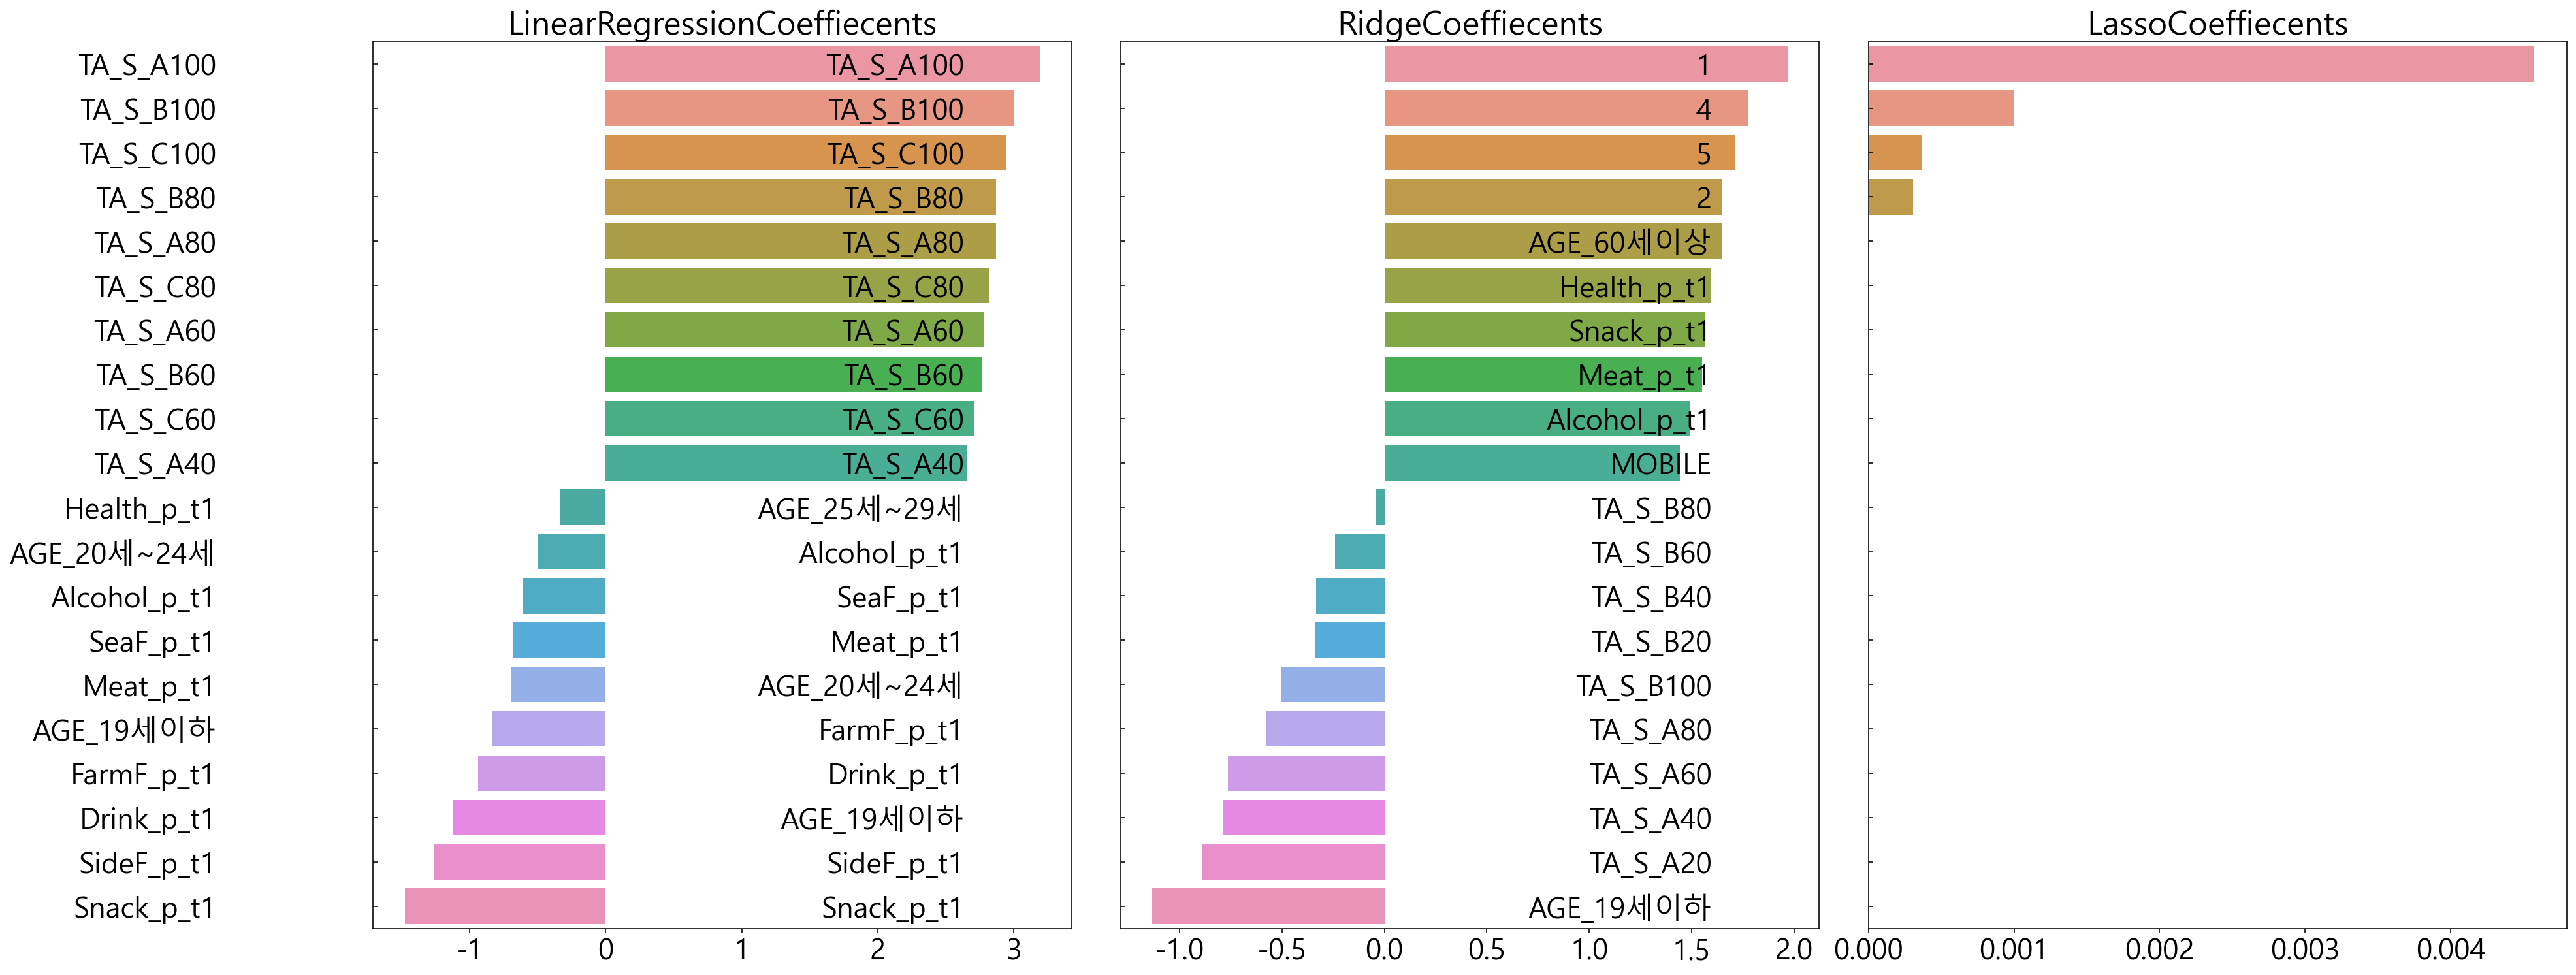

In [33]:
def visualize_coefficient(models):
    # 3개의 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위차와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+'Coeffiecents',size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [34]:
# 교차 검증
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model,X_features,y_target,\
                                            scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, \
                                                np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))
        
    
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE 값 출력
models = [lr_reg,ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.373 0.311 0.406 0.47  0.68 ]
LinearRegression CV 평균 RMSE 값: 0.448

Ridge CV RMSE 값 리스트: [0.371 0.31  0.407 0.473 0.691]
Ridge CV 평균 RMSE 값: 0.45

Lasso CV RMSE 값 리스트: [0.497 0.418 0.477 0.584 0.825]
Lasso CV 평균 RMSE 값: 0.56


In [35]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
    grid_model =GridSearchCV(model,param_grid=params,
                            scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_features,y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSLE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                            np.round(rmse,4),grid_model.best_params_))
    return grid_model.best_estimator_
ridge_params = {'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSLE 값:0.4659, 최적 alpha:{'alpha': 0.05}
Lasso 5 CV 시 최적 평균 RMSLE 값:0.4809, 최적 alpha:{'alpha': 0.001}


Lasso(alpha=0.001)

LinearRegression로그 변환된 RMSLE: 0.414
Variance score : 0.717
Ridge로그 변환된 RMSLE: 0.414
Variance score : 0.717
Lasso로그 변환된 RMSLE: 0.43
Variance score : 0.695


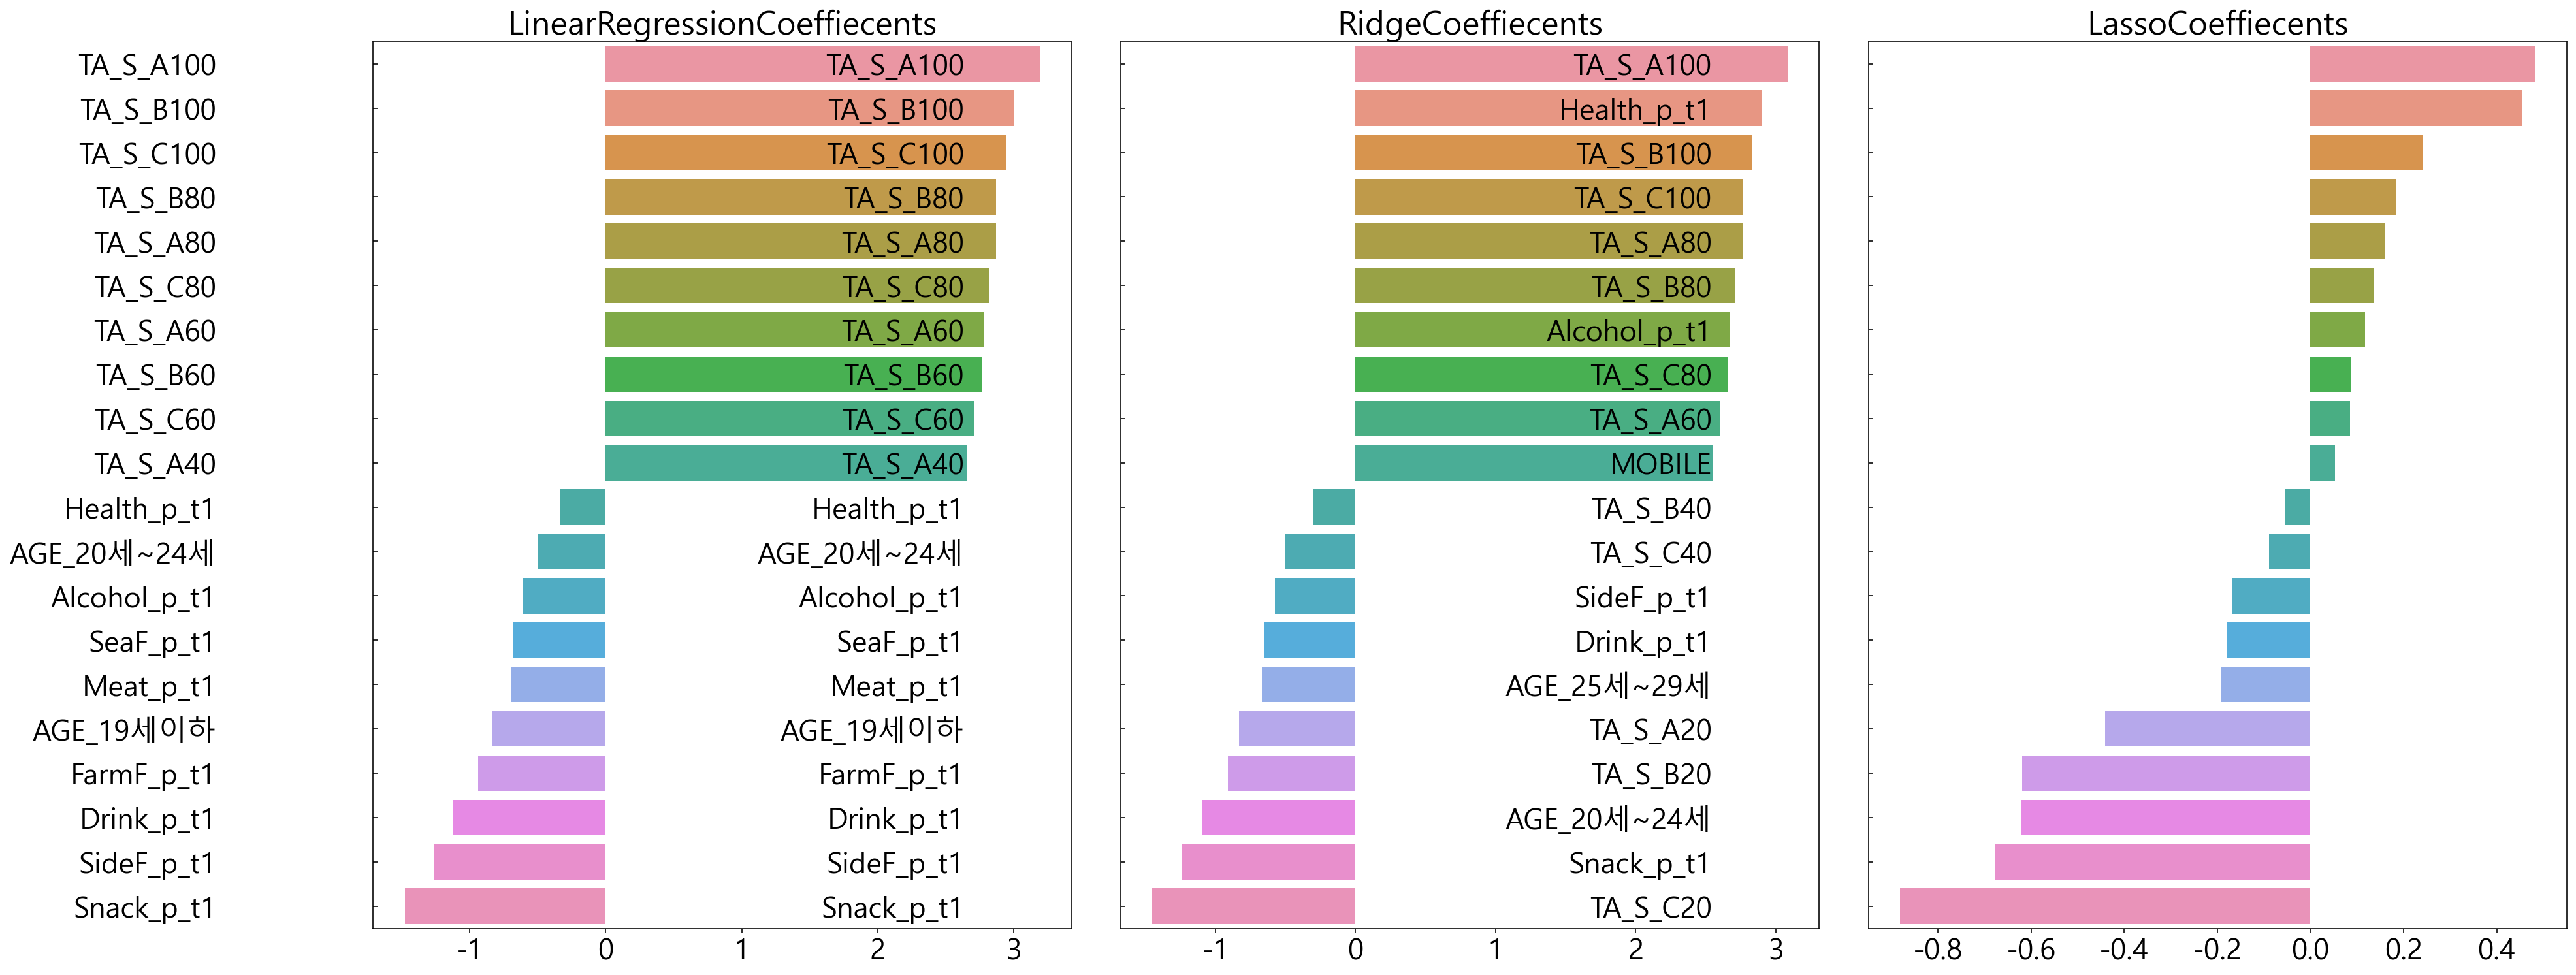

In [36]:
# 앞의  최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [37]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

[16:11:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSLE 값:0.1568, 최적 alpha:{'n_estimators': 1000}


In [38]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000, 2000, 5000]}
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.01, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSLE 값:0.1733, 최적 alpha:{'n_estimators': 5000}


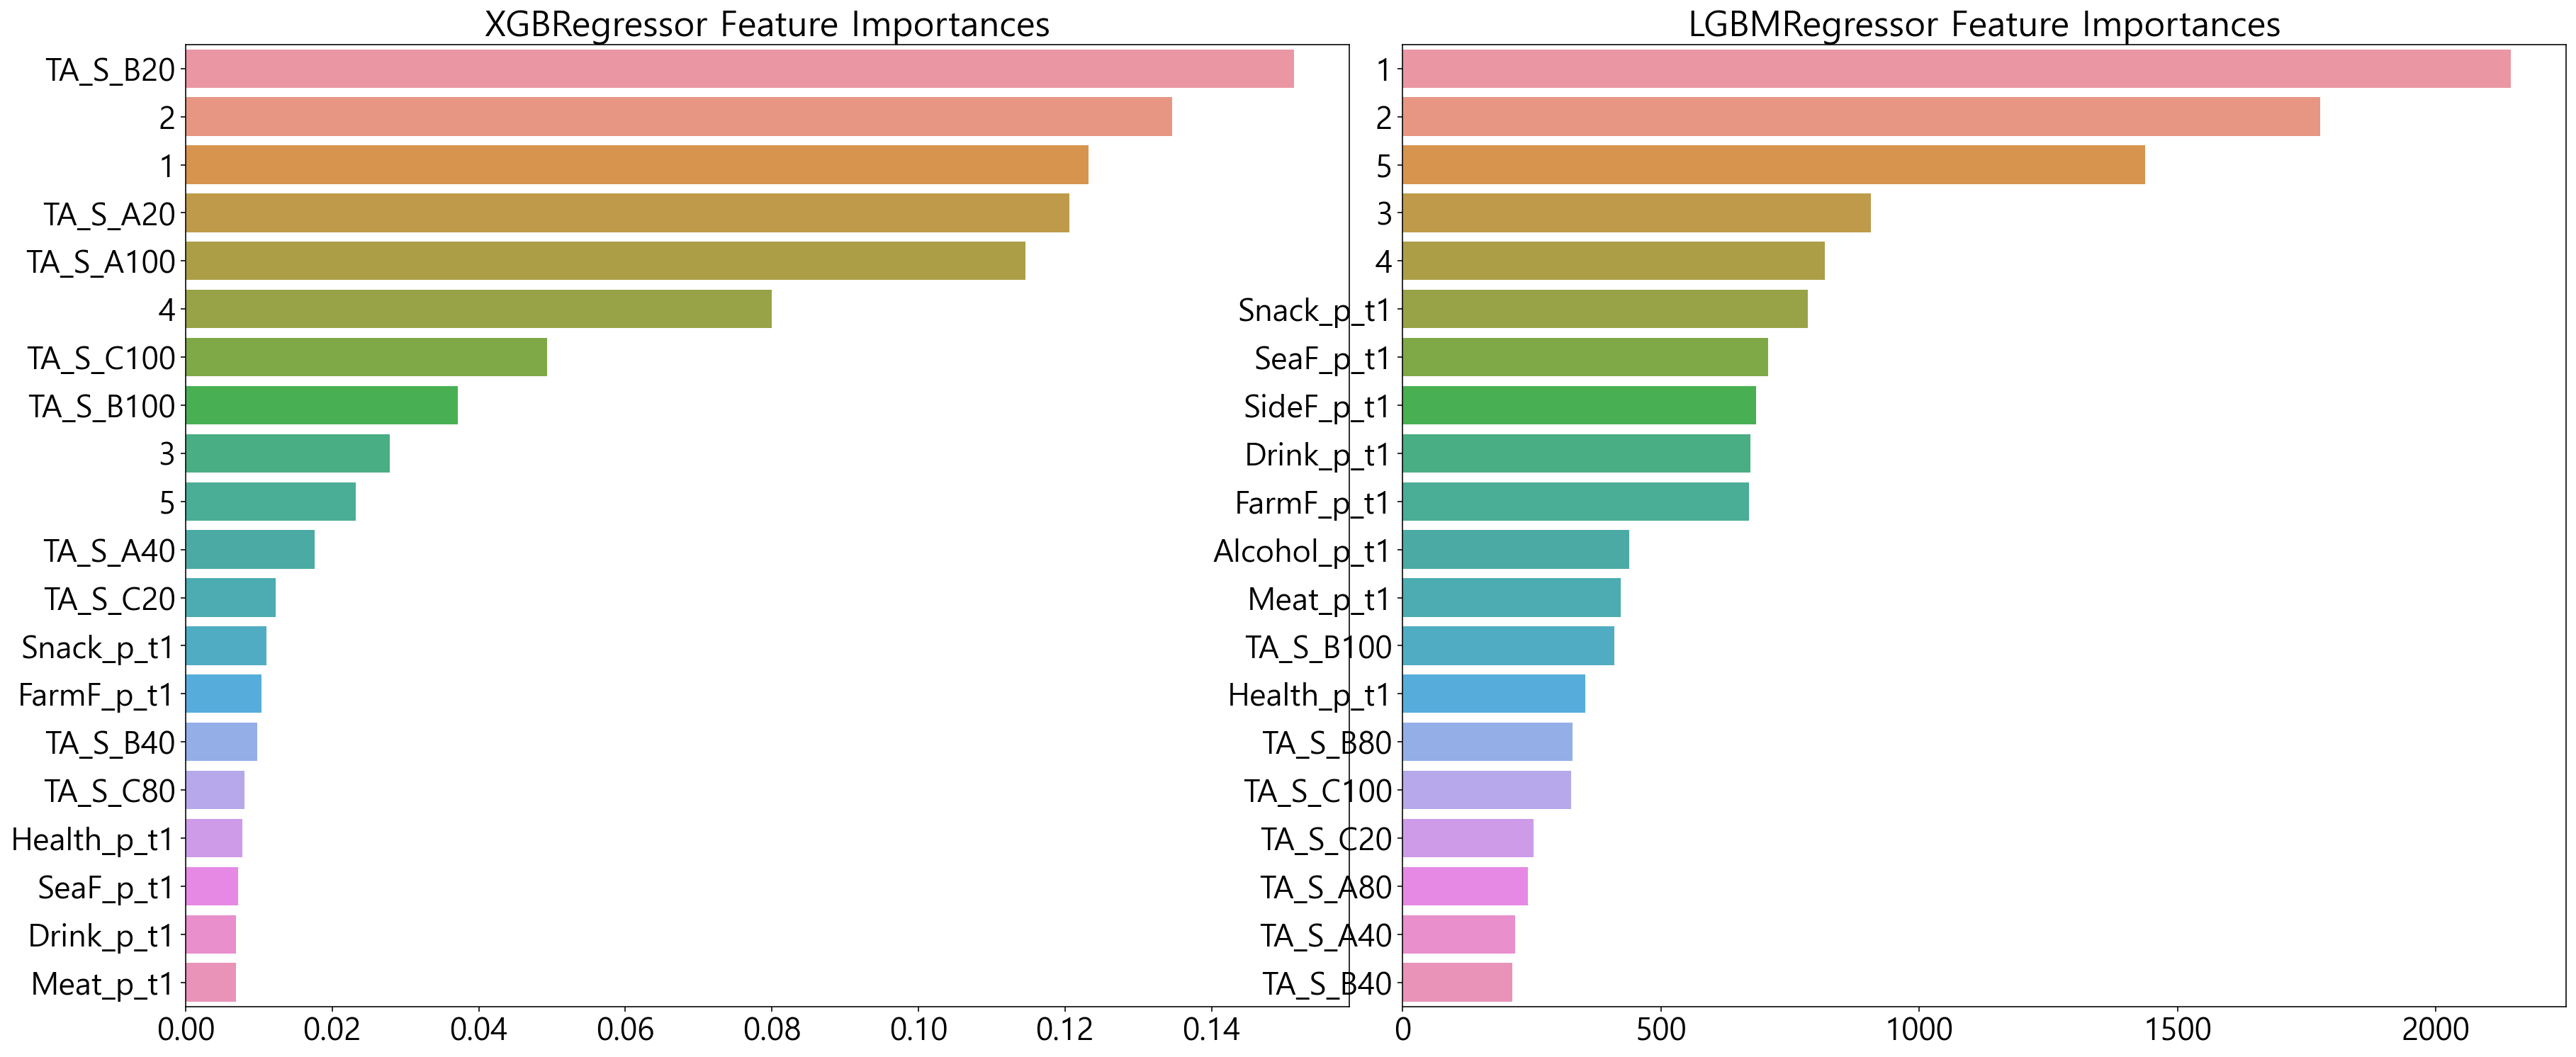

In [39]:

# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [40]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSLE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSLE: 0.4271926179622546
Ridge 모델의 RMSLE: 0.42412607099862615
Lasso 모델의 RMSLE: 0.42983932699936755


In [41]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8,random_state=151)
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1,random_state=151)

# 개별 모델의 학습
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

# 개별 모델 예측
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
#최종 혼합 모델, 개별모델의 RMSLE 값 출력        
get_rmse_pred(preds)
print('Variance score : {0:.3f}'.format(r2_score(y_test,pred)))

[16:12:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSLE: 0.134091615867384
XGBM 모델의 RMSLE: 0.13908188600795754
LGBM 모델의 RMSLE: 0.13719145732685267
Variance score : 0.970


In [53]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(lgbm_pred)
df1.reset_index(inplace=True)
df1.isnull().sum()
df2.isnull().sum()
df =pd.concat([df1,df2],axis=1)
#df = df1.merge(df2,left_index=True, right_index=True,how='outer')
#df = df1.merge(df2,left_index=True, right_index=True,how='inner')
# df1.shape
# df2.shape
#df = df1.merge(df2,left_index=True, right_index=True,how='left')
df.isnull().sum()
#columns='True_values'
#columns = 'Prediced_values'
df.columns[:]
df = df.rename({'log_TOTAL_AMT':'True_values',0:'Predicted_values'},axis='columns')


# 로그변환
df1 = np.expm1(df.True_values)
df2 = np.expm1(df.Predicted_values)
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df2.astype(int)
df =pd.concat([df1,df2],axis=1)
df['Predicted_values'] = df['Predicted_values'].astype(int)
df['True_values'] = df['True_values'].astype(int)
df.head()

#df = df1.merge(df2,left_index=True, right_index=True,how='inner')

# df1 = df['True_values'].astype(int)
# df2 = df['Prediced_values'].astype(int)
# df1 = pd.DataFrame(df1)
# df2 = pd.DataFrame(df2)
# df = df1.merge(df2,left_index=True, right_index=True,how='inner')
df.head()
#df['True_values'].value_counts()
print('예상 매출액 합:',np.sum(df.Predicted_values))
df.head(4)

예상 매출액 합: 32070204299


,True_values,Predicted_values
0,10328734,10063525
1,6287627,6502329
2,6598185,7644796
3,12806681,13404571


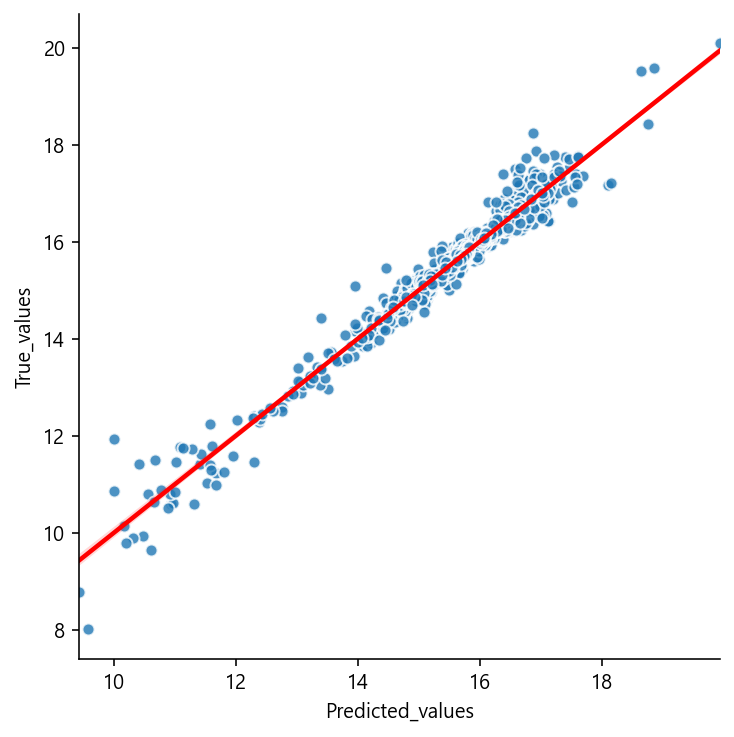

In [47]:
# ax = sns.lmplot(x='Predicted_values',y='True_values',data=df,line_kws={'color':"red"},order=1,scatter_kws={'edgecolor':"white"})

In [44]:
# 학습된 데이터를 통해 스넥카테고리 고객 매출비중에 +2%된 값으로 예측한 고객 예측금액 확인
# print(X_test) # 피쳐
# print(y_test) # 레이블
# print(X_train) # 피쳐
#print(y_train) # 레이블

In [54]:
X_test['Meat_p_t1'] = X_test['Meat_p_t1']+0.05
X_test['Snack_p_t1'] = X_test['Snack_p_t1']-0.05

# X_test['Meat_p_t1'] = X_test['Meat_p_t1']-0.05
# X_test['Snack_p_t1'] = X_test['Snack_p_t1']+0.05

# X_test['Meat_p_t1'] = X_test['Meat_p_t1']-0.05
# X_test['Snack_p_t1'] = X_test['Snack_p_t1']+0.05

# ----------------------------------------------------------------

# X_test['Meat_p_t1'] = X_test['Meat_p_t1']-0.05
# # X_test['Alcohol_p_t1'] = X_test['Alcohol_p_t1']-0.03


# # X_test['Alcohol_p_t1'] = X_test['Alcohol_p_t1']+0.03
# X_test['Snack_p_t1'] = X_test['Snack_p_t1']+0.05


# X_test['Snack_p_t1'] = X_test['Snack_p_t1']+0.03
# X_test['FarmF_p_t1'] = X_test['FarmF_p_t1']-0.03


# X_test['FarmF_p_t1'] = X_test['FarmF_p_t1']+0.03
# X_test['Health_p_t1'] = X_test['Health_p_t1']-0.03


# X_test['Health_p_t1'] = X_test['Health_p_t1']+0.03
# X_test['SeaF_p_t1'] = X_test['SeaF_p_t1']-0.03

# X_test['SeaF_p_t1'] = X_test['SeaF_p_t1']+0.03
# X_test['SideF_p_t1'] = X_test['SideF_p_t1']-0.03


# X_test['SideF_p_t1'] = X_test['SideF_p_t1']+0.03
# X_test['Drink_p_t1'] = X_test['Drink_p_t1']-0.03

# X_test['Drink_p_t1'] = X_test['Drink_p_t1']+0.03
# X_test['Meat_p_t1'] = X_test['Meat_p_t1']-0.03
# -------------------- 농산물 ----------------------------------
# X_test['FarmF_p_t1'] = X_test['FarmF_p_t1']+0.03
# X_test['Alcohol_p_t1'] = X_test['Alcohol_p_t1']-0.03


# X_test['Alcohol_p_t1'] = X_test['Alcohol_p_t1']+0.03
# X_test['Snack_p_t1'] = X_test['Snack_p_t1']-0.03


# X_test['Snack_p_t1'] = X_test['Snack_p_t1']+0.03
# X_test['Meat_p_t1'] = X_test['Meat_p_t1']-0.03


# X_test['Meat_p_t1'] = X_test['Meat_p_t1']+0.03
# X_test['Health_p_t1'] = X_test['Health_p_t1']-0.03


# X_test['Health_p_t1'] = X_test['Health_p_t1']+0.03
# X_test['SeaF_p_t1'] = X_test['SeaF_p_t1']-0.03

# X_test['SeaF_p_t1'] = X_test['SeaF_p_t1']+0.03
# X_test['SideF_p_t1'] = X_test['SideF_p_t1']-0.03


# X_test['SideF_p_t1'] = X_test['SideF_p_t1']+0.03
# X_test['Drink_p_t1'] = X_test['Drink_p_t1']-0.03

# X_test['Drink_p_t1'] = X_test['Drink_p_t1']+0.03
# X_test['Meat_p_t1'] = X_test['Meat_p_t1']+0.03

# X_test['FarmF_p_t1'] = X_test['FarmF_p_t1']-0.03


# -------------------- 간식류 ----------------------------------
# X_test['Snack_p_t1'] = X_test['Snack_p_t1']+0.03
# X_test['Alcohol_p_t1'] = X_test['Alcohol_p_t1']-0.03


# X_test['Alcohol_p_t1'] = X_test['Alcohol_p_t1']+0.03
# X_test['Meat_p_t1'] = X_test['Meat_p_t1']-0.03


# X_test['Meat_p_t1'] = X_test['Meat_p_t1']+0.03
# X_test['FarmF_p_t1'] = X_test['FarmF_p_t1']-0.03


# X_test['FarmF_p_t1'] = X_test['FarmF_p_t1']+0.03
# X_test['Health_p_t1'] = X_test['Health_p_t1']-0.03


# X_test['Health_p_t1'] = X_test['Health_p_t1']+0.03
# X_test['SeaF_p_t1'] = X_test['SeaF_p_t1']-0.03

# X_test['SeaF_p_t1'] = X_test['SeaF_p_t1']+0.03
# X_test['SideF_p_t1'] = X_test['SideF_p_t1']-0.03


# X_test['SideF_p_t1'] = X_test['SideF_p_t1']+0.03
# X_test['Drink_p_t1'] = X_test['Drink_p_t1']-0.03

# X_test['Drink_p_t1'] = X_test['Drink_p_t1']+0.03
# X_test['Snack_p_t1'] = X_test['Snack_p_t1']-0.03

In [49]:
X_test.head()

,AGE_19세이하,AGE_20세~24세,AGE_25세~29세,AGE_30세~34세,AGE_35세~39세,AGE_40세~44세,AGE_45세~49세,AGE_50세~54세,AGE_55세~59세,AGE_60세이상,GENDER_M,GENDER_F,MOBILE,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TA_S_A100,TA_S_A20,TA_S_A40,TA_S_A60,TA_S_A80,TA_S_B100,TA_S_B20,TA_S_B40,TA_S_B60,TA_S_B80,TA_S_C100,TA_S_C20,TA_S_C40,TA_S_C60,TA_S_C80,1,2,3,4,5
568,0,0,0,0,0,0,0,0,0,1,1,0,1,0.031,0.137,0.342,0.063,0.251,0.079,0.053,0.045,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,266.0,192.0,157.0,179.0,138.0
18027,0,0,0,1,0,0,0,0,0,0,1,0,0,0.093,0.137,0.238,0.000,0.206,0.064,0.101,0.161,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,46.0,87.0,109.0,250.0,1531.0
9002,0,0,0,0,1,0,0,0,0,0,0,1,0,0.005,0.013,0.340,0.026,0.334,0.143,0.013,0.126,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,166.0,126.0,111.0,159.0,538.0
15237,0,0,0,0,0,1,0,0,0,0,0,1,1,0.019,0.097,0.107,0.008,0.483,0.036,0.113,0.130,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,218.0,223.0,257.0,448.0,815.0
19276,0,0,1,0,0,0,0,0,0,0,0,1,0,0.002,0.000,0.989,0.000,0.004,0.000,0.004,0.002,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,47.0,14.0,4.0,1.0,2.0


In [55]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8,random_state=151)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1,random_state=151)

# 개별 모델의 학습
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

# 개별 모델 예측
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력        
get_rmse_pred(preds)
print('Variance score : {0:.3f}'.format(r2_score(y_test,pred)))

[16:15:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSLE: 0.15123847843995814
XGBM 모델의 RMSLE: 0.15010872923404076
LGBM 모델의 RMSLE: 0.160955163147527
Variance score : 0.962


In [56]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(lgbm_pred)
df1.reset_index(inplace=True)
df1.isnull().sum()
df2.isnull().sum()
df =pd.concat([df1,df2],axis=1)
#df = df1.merge(df2,left_index=True, right_index=True,how='outer')
#df = df1.merge(df2,left_index=True, right_index=True,how='inner')
# df1.shape
# df2.shape
#df = df1.merge(df2,left_index=True, right_index=True,how='left')
df.isnull().sum()
#columns='True_values'
#columns = 'Prediced_values'
df.columns[:]
df = df.rename({'log_TOTAL_AMT':'True_values',0:'Predicted_values'},axis='columns')

df1 = np.expm1(df.True_values)
df2 = np.expm1(df.Predicted_values)
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df2.astype(int)
df =pd.concat([df1,df2],axis=1)
df['Predicted_values'] = df['Predicted_values'].astype(int)
df['True_values'] = df['True_values'].astype(int)
df.head()

#df = df1.merge(df2,left_index=True, right_index=True,how='inner')

# df1 = df['True_values'].astype(int)
# df2 = df['Prediced_values'].astype(int)
# df1 = pd.DataFrame(df1)
# df2 = pd.DataFrame(df2)
# df = df1.merge(df2,left_index=True, right_index=True,how='inner')
df.head(4)
#df['True_values'].value_counts()

,True_values,Predicted_values
0,10328734,10079570
1,6287627,6512696
2,6598185,7668827
3,12806681,13813218


In [58]:
# # print('기존 예측 매출액: 32132734504')
# # #print('육류 구매비중을 3% 증가시 예상 매출액:',np.sum(df.Predicted_values))
# # print('육류 소비 비중 3%향상 간식류 3%하락 시 기대되는 매출 증가값(신뢰성 96%):',32483224301/32132734504)
# # print('육류 구매비중을 3% 증가시 예상 매출액:',np.sum(df.Predicted_values))
# # print('간식류 소비 비중3% 향상,육류구매비중 3% 하락 시 기대되는 매출 값: ',31867988932/32132734504)
# # print('교차 검증시 매출 차이 비교: 육류는 매출이 증가 하였지만 간식류 같은경우 비중이 높아질 경우 구매금액의 감소가 이루어졌다')
# # print('수산물 소비 비중 3% 향상 간식류 3%하락시 기대되는 매출 값:',np.sum(df.Predicted_values))
# # print('간식류 소비 비중3% 향상,육류구매비중 3% 하락 시 기대되는 매출 값: ',32337163831/32132734504)
# # print('수산물 +3%,육류 -3% 매출 값:',np.sum(df.Predicted_values))
# # print('수산물 소비 비중3% 향상,육류구매비중 3% 하락 시 기대되는 매출 값: ',31870857813/32132734504)

# print('--육류--')
# print()
# #print('육류 구매비중 3% 증가시 예상 매출액:',np.sum(df.Predicted_values))
# print('육류 구매비중 비중3% 향상,주류 구매비중 3% 하락 시 기대되는 매출 값: ',32169476225/32554258755)
# print('육류 소비 비중3% 향상,가공식품류 구매비중 3% 하락 시 기대되는 매출 값: ',32673402877/32554258755)
# print('육류 소비 비중3% 향상,농산물 구매비중 3% 하락 시 기대되는 매출 값: ',32671878780/32554258755)
# print('육류 소비 비중3% 향상,건강식품 3% 하락 시 기대되는 매출 값: ',31914996403/32554258755)
# print('육류 소비 비중3% 향상,수산물 3% 하락 시 기대되는 매출 값: ',32924919532/32554258755)
# print('육류 소비 비중3% 향상,반찬류 3% 하락 시 기대되는 매출 값: ',32706562911/32554258755)
# print('육류 소비 비중3% 향상,음료류 3% 하락 시 기대되는 매출 값: ',34295843057/32554258755)

# print()
# #print('농산물 구매비중 3% 증가시 예상 매출액:',np.sum(df.Predicted_values))
# print('--농산물--')
# print()
# print('농산물 구매비중 비중3% 향상,주류 구매비중 3% 하락 시 기대되는 매출 값: ',31737182614/32554258755)
# print('농산물 소비 비중3% 향상,가공식품류 구매비중 3% 하락 시 기대되는 매출 값: ',32239839200/32554258755)
# print('농산물 소비 비중3% 향상,육류 구매비중 3% 하락 시 기대되는 매출 값: ',31797987740/32554258755)
# print('농산물 소비 비중3% 향상,건강식품 3% 하락 시 기대되는 매출 값: ',31492343743/32554258755)
# print('농산물 소비 비중3% 향상,수산물 3% 하락 시 기대되는 매출 값: ',32454269807/32554258755)
# print('농산물 소비 비중3% 향상,반찬류 3% 하락 시 기대되는 매출 값: ',32269064195/32554258755)
# print('농산물 소비 비중3% 향상,음료류 3% 하락 시 기대되는 매출 값: ',33820482438/32554258755)
# print()
# print('--간식류--')
# print()
# #print('가공식품류 구매비중 3% 증가시 예상 매출액:',np.sum(df.Predicted_values))
# print('가공식품류 구매비중 비중3% 향상,주류 구매비중 3% 하락 시 기대되는 매출 값: ',31858846540/32554258755)
# print('가공식품류 소비 비중3% 향상,육류 구매비중 3% 하락 시 기대되는 매출 값: ',32239839200/32554258755)
# print('가공식품류 소비 비중3% 향상,농산물 구매비중 3% 하락 시 기대되는 매출 값: ',32346854255/32554258755)
# print('가공식품류 소비 비중3% 향상,건강식품 3% 하락 시 기대되는 매출 값: ',31608320348/32554258755)
# print('가공식품류 소비 비중3% 향상,수산물 3% 하락 시 기대되는 매출 값: ',32578057469/32554258755)
# print('가공식품류 소비 비중3% 향상,반찬류 3% 하락 시 기대되는 매출 값: ',32333000009/32554258755)
# print('가공식품류 소비 비중3% 향상,음료류 3% 하락 시 기대되는 매출 값: ',33804123076/32554258755)
# print()
# print('가공식품류 구매비중 3% 증가시 예상 매출액:',np.sum(df.Predicted_values))
# print('육류 소비 비중5% 향상,가공식품류 5% 하락 시 기대되는 매출 값: ',33244618069/32554258755)
# print('가공식품 소비 비중5% 향상,육류 5% 하락 시 기대되는 매출 값: ',31829324502/32554258755)


print('육류류 구매비중 5% 증가시 예상 매출액:',np.sum(df.Predicted_values))
print('육류 소비 비중5% 향상,가공식품류 5% 하락 시 기대되는 매출 값: ',33217133873/32554258755)
print('가공식품 소비 비중5% 향상,육류 5% 하락 시 기대되는 매출 값: ',31829324502/32554258755)


육류류 구매비중 5% 증가시 예상 매출액: 33217133873
육류 소비 비중5% 향상,가공식품류 5% 하락 시 기대되는 매출 값:  1.0203621628429242
가공식품 소비 비중5% 향상,육류 5% 하락 시 기대되는 매출 값:  0.9777315079278635
